In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir("C:/Users/Joe/OneDrive/سطح المكتب/Task")
df = pd.read_csv("titanic.csv",sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#I will remove the column cabin because it has alot of NaNs
df=df.drop(columns='Cabin')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [8]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [9]:
# Replacing the NaNs found in the Embarked coumns by the most occuring value 'S'
df['Embarked'].fillna('S',inplace=True)

In [10]:
print(df['Embarked'].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [12]:
print(df['Age'].mean())

29.69911764705882


In [13]:
print(df['Age'].value_counts())

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
80.00     1
36.50     1
55.50     1
14.50     1
0.42      1
Name: Age, Length: 88, dtype: int64


In [14]:
#Replacing the NaNs found in the age column with the mean of the ages
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
#Encoding the Embarked Column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Embarked']=encoder.fit_transform(df['Embarked'])
print(df['Embarked'].value_counts())

2    646
0    168
1     77
Name: Embarked, dtype: int64


In [16]:
print(df['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [17]:
#Encoding the Embarked Column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
print(df['Sex'].value_counts())

1    577
0    314
Name: Sex, dtype: int64


In [18]:
print(df['Survived'].value_counts())

No     549
Yes    342
Name: Survived, dtype: int64


In [19]:
#Encoding the Survived Column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])
print(df['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2


# Data Visualization Part

<AxesSubplot:title={'center':'Histogram of The Ages'}, xlabel='Age', ylabel='Frequency'>

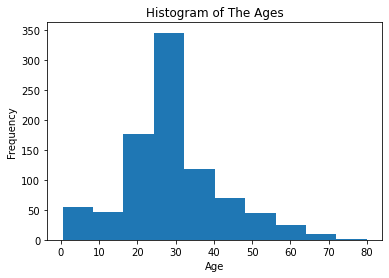

In [21]:
# Plotting the distribution of the Age
plt.title('Histogram of The Ages')
plt.xlabel('Age')
df['Age'].plot.hist()

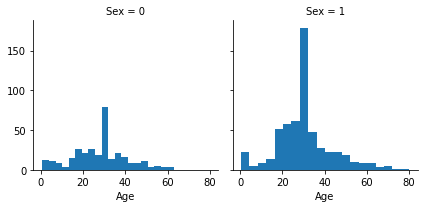

In [22]:
# Plotting the correlation between sex and Age
import seaborn as sns
g = sns.FacetGrid(df,col='Sex')
g.map(plt.hist,'Age',bins=20)

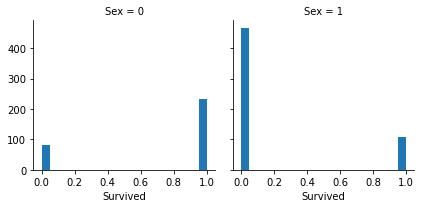

In [23]:
g = sns.FacetGrid(df,col='Sex')
g.map(plt.hist,'Survived',bins=20)
# From the Graph its is clear that the majority of the people who did not survive where males 
# and the majority of the people who survived were females

In [24]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

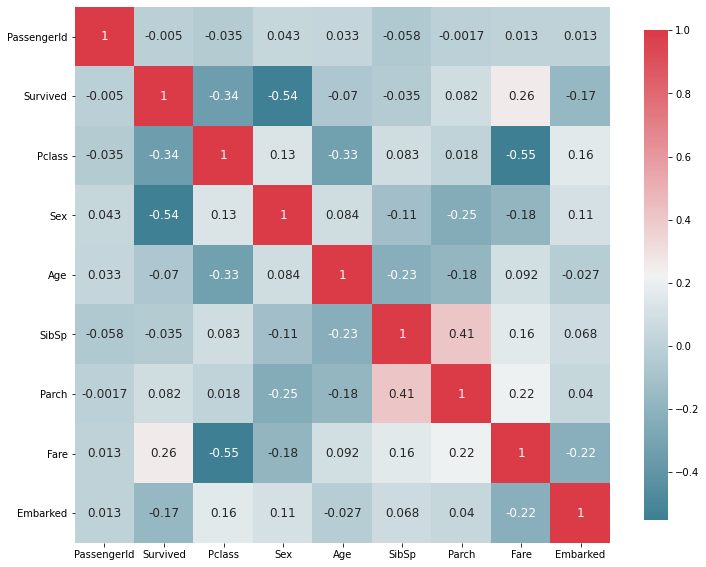

In [25]:
plot_correlation_map(df)

# From this graph we can see that the sex and survived are highly negatively correlated which is very important to focus on as we later will predict if a person will survive or not , The Pclass is highly positevly correlated with the Fare which is logical because the higher the class the more the fare will cost.
# The Pclass and Survived are negatively correlated from which we can conclude that for the higher Passenger classes many people won't survive.


In [26]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Mme           1
Ms            1
Don           1
Capt          1
Sir           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [27]:
df = df.drop(columns='Name')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,1,28.0,0,0,248740,13.0000,2,Mr
1,76,0,3,1,25.0,0,0,348123,7.6500,2,Mr
2,641,0,3,1,20.0,0,0,350050,7.8542,2,Mr
3,568,0,3,0,29.0,0,4,349909,21.0750,2,Mrs
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2,Mr


In [28]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Miss",

                    "Mr" :        "Mr",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
df.replace(Title_Dictionary,inplace=True)
df.head()
df['Title'].value_counts()

Mr         517
Miss       186
Mrs        125
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

<AxesSubplot:title={'center':'Bar Plot of Titles'}, xlabel='Title', ylabel='Passenger Count'>

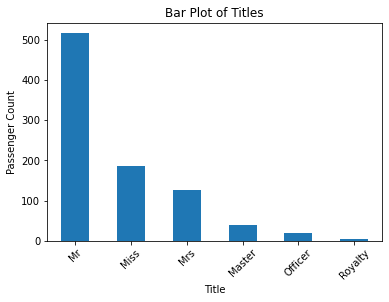

In [29]:
plt.xlabel('Title')
plt.ylabel('Passenger Count')
plt.title('Bar Plot of Titles')
c = df['Title'].value_counts()
c.plot.bar(rot=45)

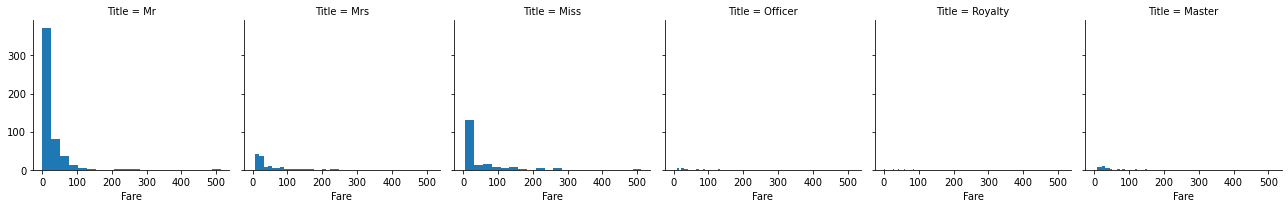

In [30]:
g = sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Fare',bins=20)

In [31]:
df['Family Size']=df['SibSp'] + df['Parch'] + 1

In [32]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
0,343,0,2,1,28.0,0,0,248740,13.0000,2,Mr,1
1,76,0,3,1,25.0,0,0,348123,7.6500,2,Mr,1
2,641,0,3,1,20.0,0,0,350050,7.8542,2,Mr,1
3,568,0,3,0,29.0,0,4,349909,21.0750,2,Mrs,5
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2,Mr,2
